# Kernel Conditional Exponential Family

AISTATS 2018 paper by Michael Arbel and Arthur Gretton. https://arxiv.org/abs/1711.05363

Short demo of the code accompanying the paper, found at https://github.com/MichaelArbel/KCEF.

## Importing required modules

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from KCEF.estimators.kcef import KCEF_Gaussian
from KCEF.data_generator import FromFileGenerator
from KCEF.tools import median_heuristic

## Loading data

In [2]:
dataset_name 	= "../data/red_wine.npy" 
gen = FromFileGenerator(dataset_name)
train_data 		= gen.generate(N = -1,dataset_type = 'train')
test_data 		= gen.generate(N = -1, dataset_type = 'test')
_, d = train_data.shape

## Building the estimator

The graph of conditional dependences can be given manually as a list of nodes. Each node contains two lists:  node[0] is the list of indices for the variable $Y$ while node[1] is the list of indices for $X$. The estimator will then estimate the conditional density of $Y$ given $X$ for each node in the graph.

Setting graph_type to either 'full', 'markov' or 'marginal' and graph to None, will build the graphs used in the paper.

In [9]:
graph = [[[5], []],[[6], [5]]]
est 	= KCEF_Gaussian(graph_type = 'custom', d = d, graph = [[[5], []],[[6], [5]]])

## Optimizing the hyperparameters

Minimizes the cross-validated score over the hyperparamters.
This step can be skiped, as the optimal hyperparameters are saved in the file: 'optimal_params.npy'. Please uncomment the first line to run the optimization.

In [ ]:
res = est.optimize_cv_score(train_data)
np.save('../data/optimal_params', res_old)
#res = np.load('../data/optimal_params.npy')
est.update_parameters(res)

## Fitting the estimator

In [ ]:
est.fit(train_data)

## Sampling from the KCEF

Sampling is performed using ancestral sampling.

In [11]:
samples = est.sample(100)

ValueError: the model is not fitted!! please first fit the model

We plot the samples 

NameError: name 'samples' is not defined

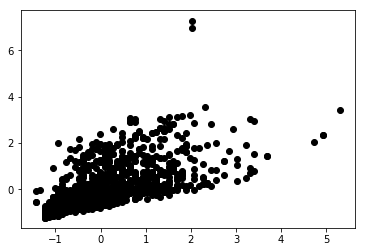

In [10]:
plt.scatter(train_data[:,graph[1][1]], train_data[:,graph[1][0]], color = 'k')
plt.scatter(samples[:,0], samples[:,1], color = 'r')
